In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
# Read in csv data file

data = pd.read_csv("data_archive/train.csv")

In [15]:
sales_df=pd.DataFrame(data)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
sales_df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [17]:
sales_df.dropna(axis=0, inplace=True)
sales_df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
Product ID       9789
Category         9789
Sub-Category     9789
Product Name     9789
Sales            9789
dtype: int64

Sub-Category
Accessories    288
Appliances     222
Art            292
Binders        396
Bookcases      136
Chairs         240
Copiers         53
Envelopes      147
Fasteners      134
Furnishings    326
Labels         173
Machines        81
Paper          348
Phones         291
Storage        278
Supplies       124
Tables         162
Name: Postal Code, dtype: int64


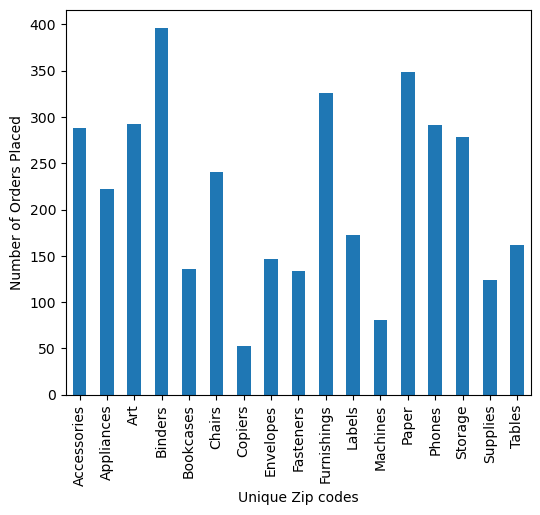

In [25]:
# Where are different sub categories most popular?
#  -group by category, count unique zip codes per category, bar graph of this information



categories_df = sales_df.groupby("Sub-Category")["Postal Code"].nunique()
categories_df.plot(kind = 'bar',ylabel='Number of Orders Placed',
         xlabel='Unique Zip codes', figsize=(6, 5))





Text(0.5, 1.0, 'Sales $ per region')

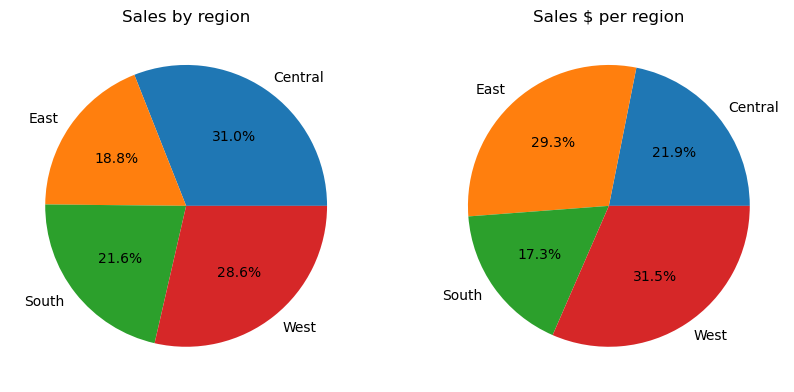

In [73]:

# Total Sales per region  

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

labels = 'Central', 'East' , 'South', 'West'
values = sales_df.groupby("Region")["Postal Code"].nunique()
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Sales by region')

# Total Sales in Dollar value  per region  

labels = 'Central', 'East' , 'South', 'West'
values = sales_df.groupby("Region")["Sales"].sum()
ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Sales $ per region')








            Order ID  Num of items  Total cost
0     CA-2015-100006             1     377.970
1     CA-2015-100090             2     699.192
2     CA-2015-100293             1      91.056
3     CA-2015-100328             1       3.928
4     CA-2015-100363             2      21.376
...              ...           ...         ...
4911  US-2018-168802             1      18.368
4912  US-2018-169320             2     171.430
4913  US-2018-169488             2      56.860
4914  US-2018-169502             2     113.410
4915  US-2018-169551             6    1344.838

[4916 rows x 3 columns]


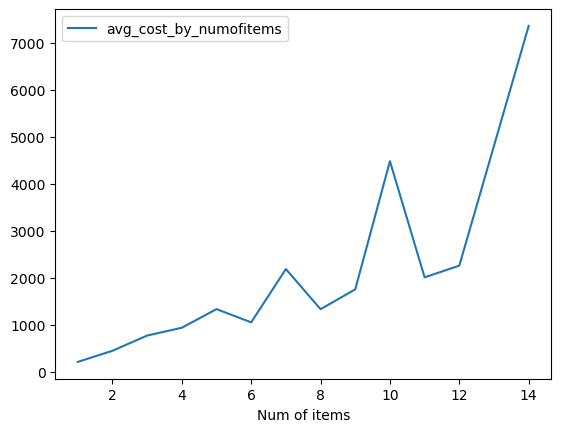

In [69]:
# Avg Cost by number of items purchased 

num_of_orders = sales_df.groupby('Order ID')["Order ID"].value_counts().to_frame('Num of items').reset_index()

total_sales_cost = sales_df.groupby('Order ID')["Sales"].sum().to_frame('Total cost').reset_index()


order_df = pd.merge(num_of_orders, total_sales_cost, on='Order ID')

avg_sales_df =order_df.groupby('Num of items')["Total cost"].mean().to_frame('avg_cost_by_numofitems').reset_index()

lines = avg_sales_df.plot.line(x="Num of items",y="avg_cost_by_numofitems")


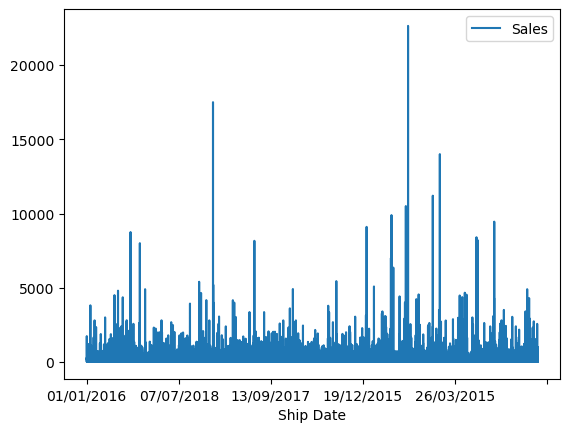

{'whiskers': [<matplotlib.lines.Line2D at 0x14b4d4850>,
 'caps': [<matplotlib.lines.Line2D at 0x14b4d7450>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b46de90>],
 'medians': [<matplotlib.lines.Line2D at 0x14b4d6750>],
 'fliers': [<matplotlib.lines.Line2D at 0x14eee5050>],
 'means': []}

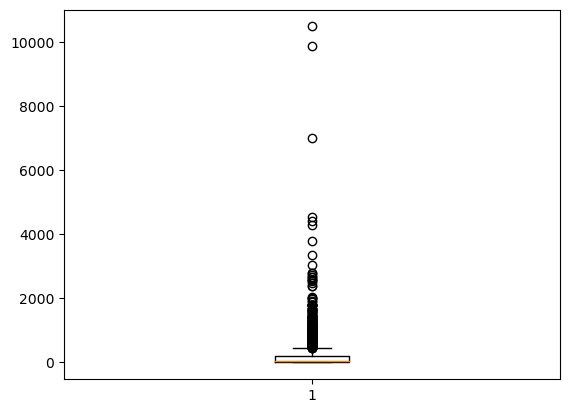

In [62]:

#box_df = order_df.loc[order_df['Num of items'] == 1]

#box_list = box_df["Total cost"]



#  -(scatter plot) x-axis=total sales cost in order, y-axis=number of items in order
#  -sales vs. time line graph 

#conditions = "(x['discharge'].isin(x['admit'])) & (x['Num1'] >= 5) & (x['Num1'] <= 12)"
#filter = df.groupby('Key').apply(lambda x: pd.eval(conditions))

